<a href="https://colab.research.google.com/github/JasmineGonzalez2021/Computational-Modeling/blob/master/Jasmine's_Colab_Week_of_2_10_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2.11.2020 IN CLASS & HW

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
import urllib
import os
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
import mpl_toolkits.mplot3d.axes3d as p3
import colorsys
from PIL import Image
from urllib.request import urlopen
from six.moves import urllib
from google.colab import drive

For the next step, you must upload a kaggle.json file. One can be downloaded to your computer by going to the [Kaggle website](https://kaggle.com). From the site header, click on your user profile picture, then on “My Account” from the dropdown menu. This will take you to your account settings [here](https://www.kaggle.com/account). Scroll down to the section of the page labelled API:

To create a new token, click on the “Create New API Token” button. This will download a fresh authentication token onto your machine. The downloaded file should be called "kaggle.json"

Upload that "kaggle.json" file in the cell below when you run it and it prompts you to choose a file.

This process will allow your computer to access the dataset on kaggle that the information for this project comes from without having to download hundreds of thousands of images of fruit to your machine.

In [0]:
#choose kaggle.json from downloads
from google.colab import files
files.upload()
#kaggle_json = urllib.request.urlopen("https://raw.githubusercontent.com/JasmineGonzalez2021/Computational-Modeling/master/kaggle.json")
#drive.mount('/content/drive')

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jasminegonzalez","key":"1815de57731bfa3d1eb0d48978f9542c"}'}

In [0]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 71 Feb 21 18:17 kaggle.json


In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/kaggle/cli.py", line 51, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 910, in dataset_list_cli
    tag_ids, search, user, mine, page)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 880, in dataset_list
    return [Dataset(d) for d in datasets_list_result]
  File "/usr/local/lib/python2.7/dist-packages/kaggle/models/kaggle_models_extended.py", line 66, in __init__
    self.size = File.get_size(self.totalBytes)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/models/kaggle_models_extended.py", line 97, in get_size
    return '%.*f%s' % (precision, size, suffixes[suffix_index])
TypeError: float argument required, not NoneType


In [0]:
#!kaggle datasets download -d fmejia21/trump-impeachment-polls --> this was for practice

In [0]:
#!head ~/.kaggle/chrisfilo/fruit-recognition --> this was for practice

In [0]:
!kaggle datasets download -d chrisfilo/fruit-recognition

100% 7.91G/7.92G [02:56<00:00, 61.4MB/s]
100% 7.92G/7.92G [02:56<00:00, 48.2MB/s]


In [0]:
!unzip fruit-recognition.zip -d fruits

In [0]:
help(Image.open)

Help on function open in module PIL.Image:

open(fp, mode='r')
    Opens and identifies the given image file.
    
    This is a lazy operation; this function identifies the file, but
    the file remains open and the actual image data is not read from
    the file until you try to process the data (or call the
    :py:meth:`~PIL.Image.Image.load` method).  See
    :py:func:`~PIL.Image.new`. See :ref:`file-handling`.
    
    :param fp: A filename (string), pathlib.Path object or a file object.
       The file object must implement :py:meth:`~file.read`,
       :py:meth:`~file.seek`, and :py:meth:`~file.tell` methods,
       and be opened in binary mode.
    :param mode: The mode.  If given, this argument must be "r".
    :returns: An :py:class:`~PIL.Image.Image` object.
    :exception IOError: If the file cannot be found, or the image cannot be
       opened and identified.



In [0]:
Image.open("Banana01.png")

FileNotFoundError: ignored

In [0]:
Image.open("Apple 1.png")

FileNotFoundError: ignored

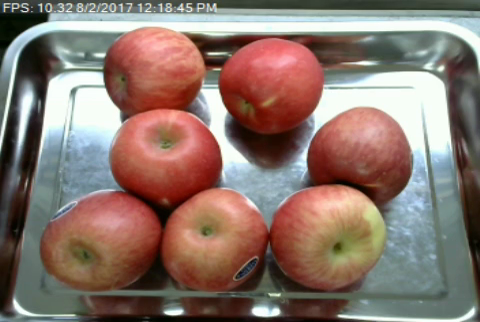

In [0]:
Image.open('fruits/Apple/Apple A/Apple 1.png')

In [0]:
apple_list = []
for image in "fruit/Apple/Apple A":
  apple_list.append(image)
print(apple_list)

['f', 'r', 'u', 'i', 't', '/', 'A', 'p', 'p', 'l', 'e', '/', 'A', 'p', 'p', 'l', 'e', ' ', 'A']


In [0]:
apple_list = []
for image in "fruit/Apple":
  apple_list.append(image)
print(apple_list)

['f', 'r', 'u', 'i', 't', '/', 'A', 'p', 'p', 'l', 'e']


In [0]:
Image.open('fruits/Apple/Apple A')

IsADirectoryError: ignored

In [0]:
!ls /content/fruits

Apple	Carambola  Kiwi   muskmelon  Peach  Persimmon  Plum	    Tomatoes
Banana	Guava	   Mango  Orange     Pear   Pitaya     Pomegranate


In [0]:
header_list = []
for item in !ls /content/fruits:
  header_list.append(item)

SyntaxError: ignored

In [0]:
import os

# List all files in a directory using os.listdir
basepath = '/content/fruits/Apple/Apple A'
for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        print(entry)

Apple 6.png
Apple 573.png
Apple 329.png
Apple 166.png
Apple 33.png
Apple 20.png
Apple 114.png
Apple 229.png
Apple 144.png
Apple 237.png
Apple 346.png
Apple 377.png
Apple 381.png
Apple 666.png
Apple 630.png
Apple 14.png
Apple 409.png
Apple 177.png
Apple 453.png
Apple 241.png
Apple 488.png
Apple 457.png
Apple 276.png
Apple 72.png
Apple 604.png
Apple 551.png
Apple 484.png
Apple 172.png
Apple 168.png
Apple 578.png
Apple 467.png
Apple 257.png
Apple 78.png
Apple 388.png
Apple 631.png
Apple 641.png
Apple 572.png
Apple 301.png
Apple 429.png
Apple 509.png
Apple 50.png
Apple 189.png
Apple 536.png
Apple 419.png
Apple 86.png
Apple 342.png
Apple 648.png
Apple 118.png
Apple 596.png
Apple 203.png
Apple 109.png
Apple 442.png
Apple 239.png
Apple 479.png
Apple 176.png
Apple 146.png
Apple 335.png
Apple 544.png
Apple 159.png
Apple 149.png
Apple 579.png
Apple 521.png
Apple 395.png
Apple 494.png
Apple 202.png
Apple 3.png
Apple 205.png
Apple 595.png
Apple 55.png
Apple 499.png
Apple 566.png
Apple 163.png
Appl

In [0]:
apple_a_basepath = '/content/fruits/Apple/Apple A'
apple_a_list = []
for entry in os.listdir(apple_a_basepath):
    if os.path.isfile(os.path.join(apple_a_basepath, entry)):
      apple_a_list.append(entry)
print(apple_a_list)

['Apple 6.png', 'Apple 573.png', 'Apple 329.png', 'Apple 166.png', 'Apple 33.png', 'Apple 20.png', 'Apple 114.png', 'Apple 229.png', 'Apple 144.png', 'Apple 237.png', 'Apple 346.png', 'Apple 377.png', 'Apple 381.png', 'Apple 666.png', 'Apple 630.png', 'Apple 14.png', 'Apple 409.png', 'Apple 177.png', 'Apple 453.png', 'Apple 241.png', 'Apple 488.png', 'Apple 457.png', 'Apple 276.png', 'Apple 72.png', 'Apple 604.png', 'Apple 551.png', 'Apple 484.png', 'Apple 172.png', 'Apple 168.png', 'Apple 578.png', 'Apple 467.png', 'Apple 257.png', 'Apple 78.png', 'Apple 388.png', 'Apple 631.png', 'Apple 641.png', 'Apple 572.png', 'Apple 301.png', 'Apple 429.png', 'Apple 509.png', 'Apple 50.png', 'Apple 189.png', 'Apple 536.png', 'Apple 419.png', 'Apple 86.png', 'Apple 342.png', 'Apple 648.png', 'Apple 118.png', 'Apple 596.png', 'Apple 203.png', 'Apple 109.png', 'Apple 442.png', 'Apple 239.png', 'Apple 479.png', 'Apple 176.png', 'Apple 146.png', 'Apple 335.png', 'Apple 544.png', 'Apple 159.png', 'Appl

In [0]:
apple_basepath = '/content/fruits/Apple/Total Number of Apples'
apple_list = []
for entry in os.listdir(apple_basepath):
    if os.path.isfile(os.path.join(apple_basepath, entry)):
      apple_list.append(entry)
print(apple_list)

['Apple 01256.png', 'Apple 0638.png', 'Apple 0399.png', 'Apple 01594.png', 'Apple 0558.png', 'Apple 01235.png', 'Apple 01598.png', 'Apple 034.png', 'Apple 01668.png', 'Apple 03960.png', 'Apple 03352.png', 'Apple 02052.png', 'Apple 03585.png', 'Apple 03878.png', 'Apple 02925.png', 'Apple 02863.png', 'Apple 04520.jpeg', 'Apple 04583.jpeg', 'Apple 04228.jpeg', 'Apple 03140.png', 'Apple 04516.jpeg', 'Apple 04221.jpeg', 'Apple 04353.jpeg', 'Apple 0237.png', 'Apple 067.png', 'Apple 04296.jpeg', 'Apple 04268.jpeg', 'Apple 04549.jpeg', 'Apple 04681.png', 'Apple 03369.png', 'Apple 01731.png', 'Apple 04092.png', 'Apple 0939.png', 'Apple 03020.png', 'Apple 01159.png', 'Apple 0936.png', 'Apple 02960.png', 'Apple 0683.png', 'Apple 04488.jpeg', 'Apple 0813.png', 'Apple 01747.png', 'Apple 03599.png', 'Apple 01479.png', 'Apple 02723.png', 'Apple 03155.png', 'Apple 01381.png', 'Apple 0198.png', 'Apple 03233.png', 'Apple 03091.png', 'Apple 04680.png', 'Apple 03939.png', 'Apple 04428.jpeg', 'Apple 04462.

In [0]:
print(len(apple_list))
print(len(apple_a_list))

5024
692


In [0]:
banana_basepath = '/content/fruits/Banana'
banana_list = []
for entry in os.listdir(banana_basepath):
    if os.path.isfile(os.path.join(banana_basepath, entry)):
      banana_list.append(entry)
print(banana_list)

['Banana02535.png', 'Banana01523.png', 'Banana02269.png', 'Banana01386.png', 'Banana01090.png', 'Banana0136.png', 'Banana01895.png', 'Banana0245.png', 'Banana02687.png', 'Banana01202.png', 'Banana0986.png', 'Banana01197.png', 'Banana02951.png', 'Banana02924.png', 'Banana01438.png', 'Banana03023.png', 'Banana01990.png', 'Banana0874.png', 'Banana027.png', 'Banana0169.png', 'Banana02655.png', 'Banana02379.png', 'Banana0987.png', 'Banana01672.png', 'Banana055.png', 'Banana0394.png', 'Banana01594.png', 'Banana01460.png', 'Banana0968.png', 'Banana01124.png', 'Banana02262.png', 'Banana0855.png', 'Banana01649.png', 'Banana02247.png', 'Banana0529.png', 'Banana01932.png', 'Banana02388.png', 'Banana0176.png', 'Banana02045.png', 'Banana0888.png', 'Banana02596.png', 'Banana053.png', 'Banana02594.png', 'Banana0688.png', 'Banana02232.png', 'Banana0508.png', 'Banana02552.png', 'Banana02445.png', 'Banana02123.png', 'Banana02267.png', 'Banana01988.png', 'Banana02995.png', 'Banana02452.png', 'Banana0289.

In [0]:
print(len(banana_list))

3027


In [0]:
FRUITTYPE_basepath = '/content/fruits/FRUITTYPE'
FRUITTYPE_list = []
for entry in os.listdir(FRUITTYPE_basepath):
    if os.path.isfile(os.path.join(FRUITTYPE_basepath, entry)):
      FRUITTYPE_list.append(entry)
print(FRUITTYPE_list)
print(len(FRUITTYPE_list))

FileNotFoundError: ignored